In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
pearsonr, spearmanr, kendalltau, f_oneway, kruskal

In [245]:
# Campaign Name: The name of the campaign
# Date: Date of the record
# Spend: Amount spent on the campaign in dollars
# of Impressions: Number of impressions the ad crossed through the campaign
# Reach: The number of unique impressions received in the ad
# of Website Clicks: Number of website clicks received through the ads
# of Searches: Number of users who performed searches on the website
# of View Content: Number of users who viewed content and products on the website
# of Add to Cart: Number of users who added products to the cart
# of Purchase: Number of purchases
# Reach looks at the number of individual people who see your piece of content. For example, 
# if 100 people see your ad, that is your reach. Impressions, on the other hand, refer to the number of times your content is displayed.

# Load data

df_control = pd.read_csv('control_group.csv', sep=';')
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
df_test = pd.read_csv('test_group.csv', sep=';')
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [247]:
# Change Columns' names

df_control.columns = ['Campaign Name', 'Date', 'Amount Spent',
                      'Number of Impressions', 'Reach', 'Website Clicks',
                      'Searches Received', 'Content Viewed', 'Added to Cart',
                      'Purchases']

df_test.columns = ['Campaign Name', 'Date', 'Amount Spent',
                   'Number of Impressions', 'Reach', 'Website Clicks',
                   'Searches Received', 'Content Viewed', 'Added to Cart',
                   'Purchases']

In [248]:
# Check Missing Values

df_control.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [249]:
df_test.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [250]:
df_control.describe()

,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [251]:
# Fill Null Values with the Mean

df_control['Number of Impressions'].fillna(value=df_control['Number of Impressions'].mean(), inplace=True)
df_control['Reach'].fillna(value=df_control['Reach'].mean(), inplace=True)
df_control['Website Clicks'].fillna(value=df_control['Website Clicks'].mean(), inplace=True)
df_control['Searches Received'].fillna(value=df_control['Searches Received'].mean(), inplace=True)
df_control['Content Viewed'].fillna(value=df_control['Content Viewed'].mean(), inplace=True)
df_control['Added to Cart'].fillna(value=df_control['Added to Cart'].mean(), inplace=True)
df_control['Purchases'].fillna(value=df_control['Purchases'].mean(), inplace=True)

/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_23974/3358833341.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_control['Number of Impressions'].fillna(value=df_control['Number of Impressions'].mean(), inplace=True)
/var/folders/wk/sjdjx94s6pzdbsvs0ktmtncr0000gn/T/ipykernel_23974/3358833341.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because t

In [252]:
# check the missing values of control group again

df_control.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [253]:
# Merge dataset

df = pd.concat([df_control, df_test], ignore_index=True)
df.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2.08.2019,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,3.08.2019,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,4.08.2019,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,5.08.2019,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103


In [254]:
df.groupby('Campaign Name').agg(
    {'Purchases': 'mean', 'Number of Impressions': 'mean', 'Website Clicks': 'mean',
    'Content Viewed': 'mean', 'Added to Cart': 'mean', 'Amount Spent':'mean', 'Reach': 'mean'}
)

,Purchases,Number of Impressions,Website Clicks,Content Viewed,Added to Cart,Amount Spent,Reach
Campaign Name,,,,,,,
Control Campaign,522.793103,109559.758621,5320.793103,1943.793103,1300.000000,2288.433333,88844.931034
Test Campaign,521.233333,74584.800000,6032.333333,1858.000000,881.533333,2563.066667,53491.566667


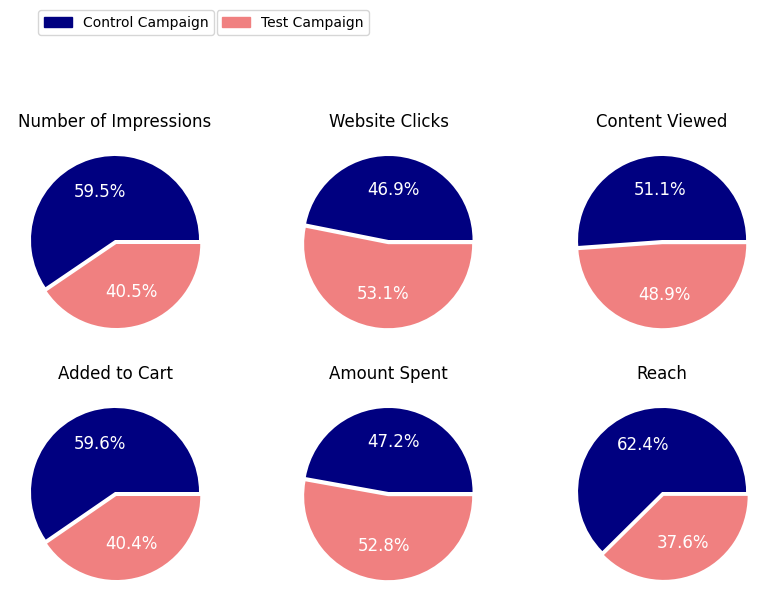

In [255]:
import matplotlib.patches as mpatches

colors = ['navy', 'lightcoral']
labels = ['Control Campaign', 'Test Campaign']
fig = plt.figure(figsize=(10,6))
control_patch = mpatches.Patch(color=colors[0], label=labels[0])
test_patch = mpatches.Patch(color=colors[1], label=labels[1])
fig.legend(handles=[control_patch], bbox_to_anchor = (0.345, 1.1))
fig.legend(handles=[test_patch], bbox_to_anchor = (0.5, 1.1))

plt.subplot(231)
plt.title('Number of Impressions')
paches, texts, autotexts = plt.pie([sum(df_control['Number of Impressions']), sum(df_test['Number of Impressions'])], autopct='%1.1f%%', explode=[0, 0.05], colors= colors)

for text in texts+autotexts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_color('white')

plt.subplot(232)
plt.title('Website Clicks')
paches, texts, autotexts = plt.pie([sum(df_control['Website Clicks']), sum(df_test['Website Clicks'])], autopct='%1.1f%%', explode=[0, 0.05], colors= colors)

for text in texts+autotexts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_color('white')

plt.subplot(233)
plt.title('Content Viewed')
paches, texts, autotexts = plt.pie([sum(df_control['Content Viewed']), sum(df_test['Content Viewed'])], autopct='%1.1f%%', explode=[0, 0.05], colors= colors)

for text in texts+autotexts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_color('white')

plt.subplot(234)
plt.title('Added to Cart')
paches, texts, autotexts = plt.pie([sum(df_control['Added to Cart']), sum(df_test['Added to Cart'])], autopct='%1.1f%%', explode=[0, 0.05], colors= colors)

for text in texts+autotexts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_color('white')

plt.subplot(235)
plt.title('Amount Spent')
paches, texts, autotexts = plt.pie([sum(df_control['Amount Spent']), sum(df_test['Amount Spent'])], autopct='%1.1f%%', explode=[0, 0.05], colors= colors)

for text in texts+autotexts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_color('white')

plt.subplot(236)
plt.title('Reach')
paches, texts, autotexts = plt.pie([sum(df_control['Reach']), sum(df_test['Reach'])], autopct='%1.1f%%', explode=[0, 0.05], colors= colors)

for text in texts+autotexts:
    text.set_fontsize(12)
for text in autotexts:
    text.set_color('white')


**Conclusions**
1. Test Campaign outperfomed on Website Clicks and Amount Spent.
2. Control Campaign outperformed on Content Viewed, Added to Cart and Reach.

**Interpretation**
1. Test Campaign result in better Amount Spent with fewer Number of Impressions, which means that test campaign may better than control campaign.
2. The outperformance of control campaign may due to more Number of Impressions.



# A/B Testing

$A.$ **Assumption Check**\
    Normality Assumption
    : If normality and variance homogeneity are provided,\
    an **independent two-sample t-test** (parametric) is applied.\
    If normality and homogeneity of variance are not provided,\
    the **Mann-Whitney U test** (non-parametric test) is performed.

1. Normality Assumption Check\
**The Shapiro-Wilks Test** will be applied for Normality
    * Ho: There is no statisically significant difference between sample distribution and theoretical normal distribution.
    * H1: There is statistically significant difference between sample distribution and theoretical normal distribution.

* Ho: M1 = M2 The null hypothesis is that there is no significant difference between groups
* H1: M1 != M2 The alternative hypothesis is that there is significant difference between groups

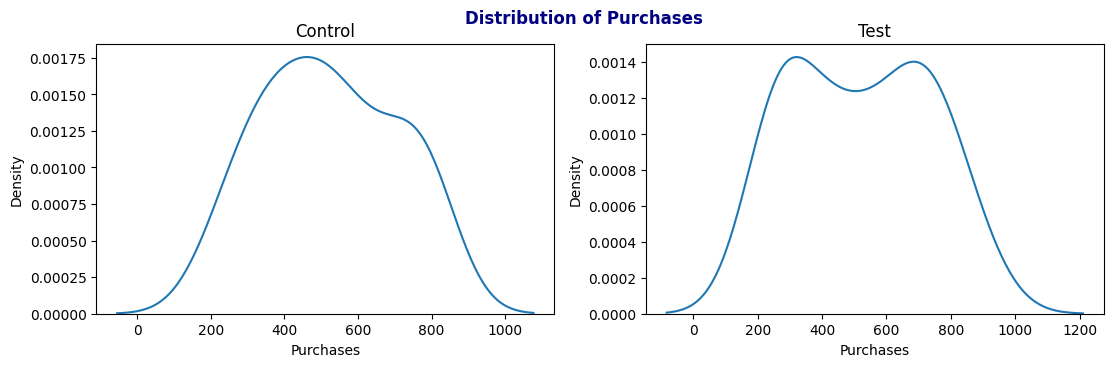

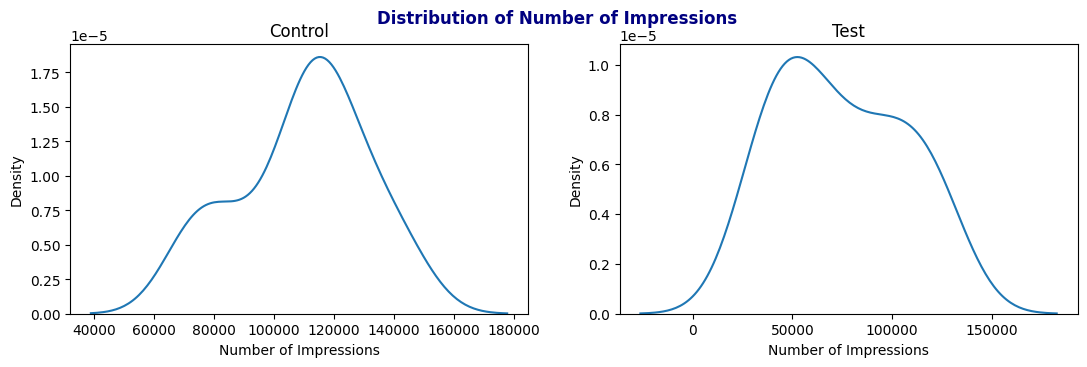

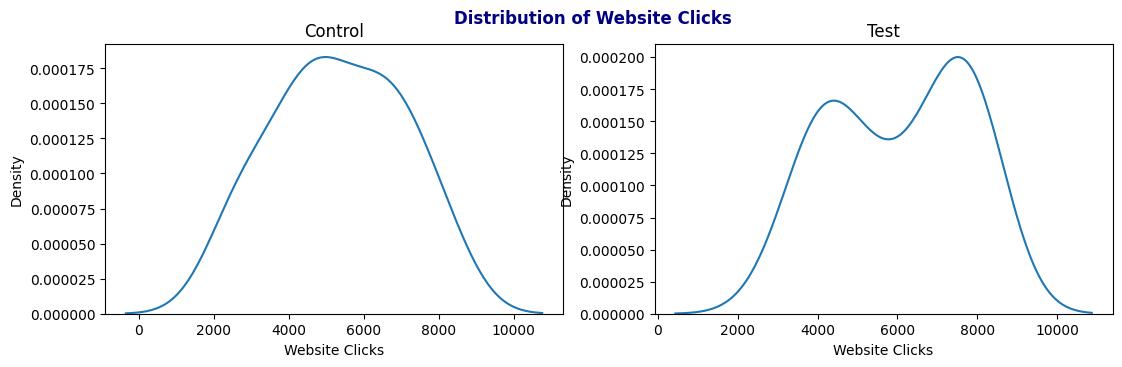

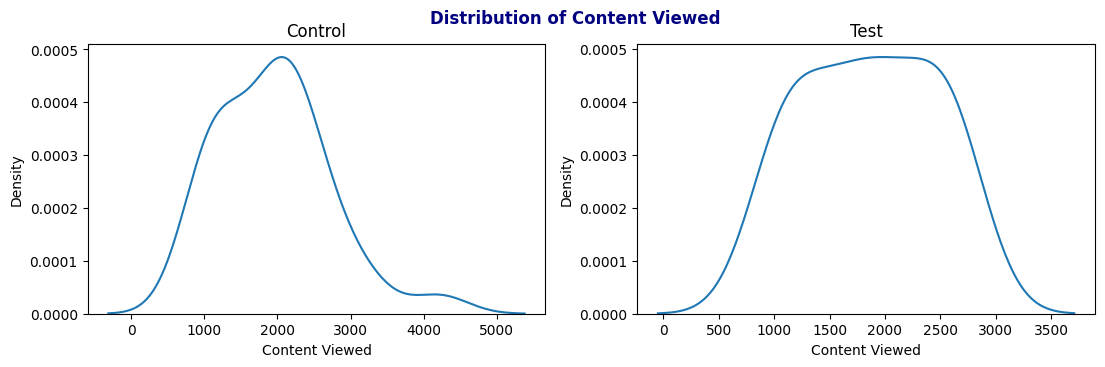

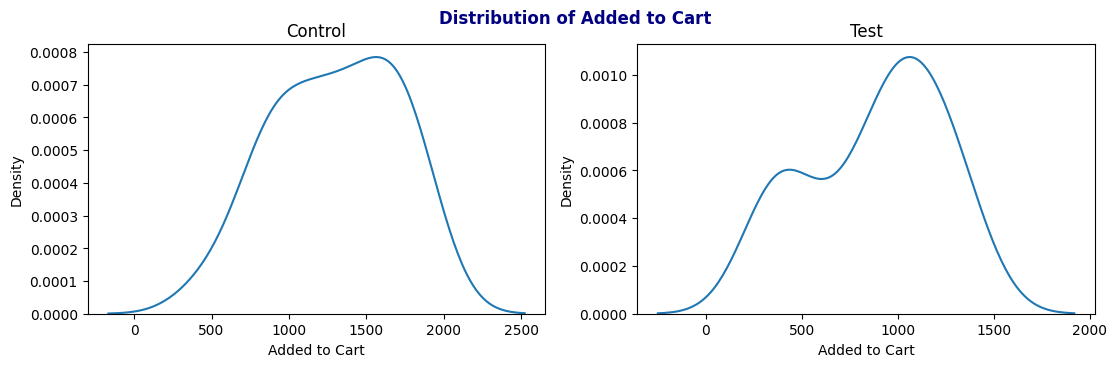

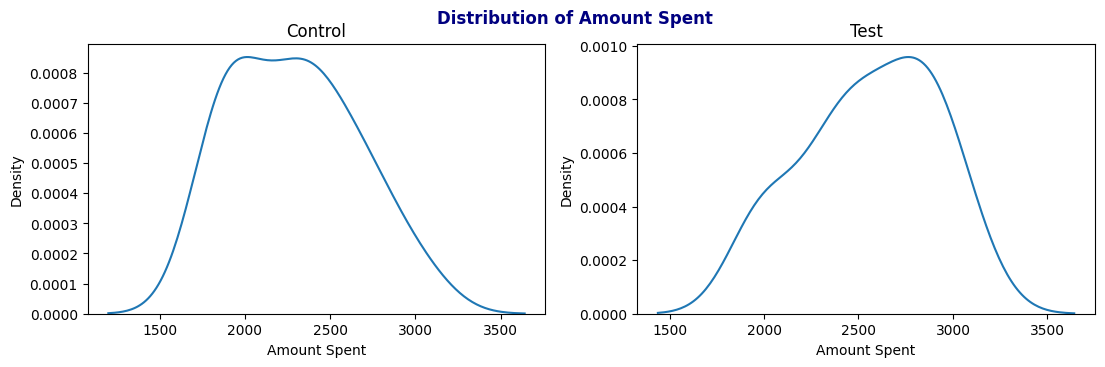

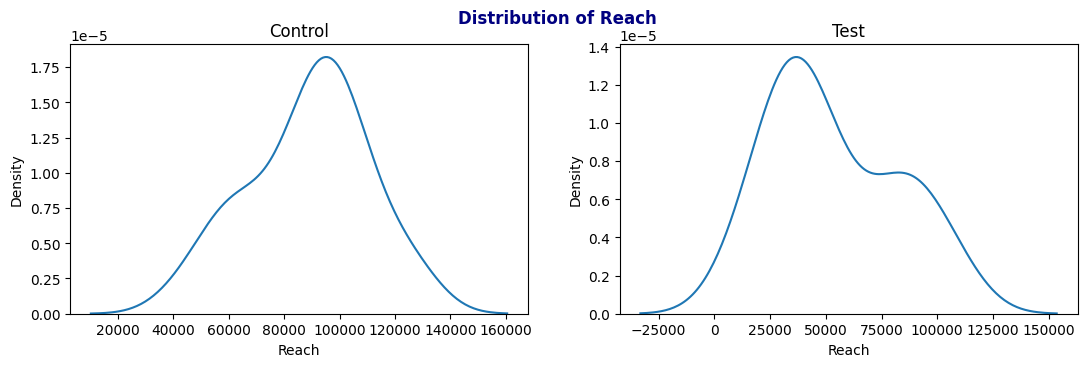

In [256]:
# Visualize the data distributions
# We can know if the data is normal distribution, but we need to apply statistical tests for accurucy. 

cols = ['Purchases', 'Number of Impressions', 'Website Clicks', 'Content Viewed', 'Added to Cart', 'Amount Spent', 'Reach']

for col in cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 3.5))

    sns.kdeplot(data=df_control[col], ax=ax1)
    ax1.set_title('Control')
    

    sns.kdeplot(data=df_test[col], ax=ax2)
    ax2.set_title('Test')

    fig.suptitle(f'Distribution of {col}', fontweight='bold', fontsize=12, color='navy')
    plt.tight_layout
    plt.show()


In [257]:
# Normality Check
# The Shapiro–Wilk test is more appropriate method for small sample sizes (<50 samples) although it can also be handling on larger sample size 
# while Kolmogorov–Smirnov test is used for n ≥50. 
# For both of the above tests, null hypothesis states that data are taken from normal distributed population.

test_stat, pvalue = shapiro(df.loc[df['Campaign Name']=='Control Campaign', 'Purchases'])
print(f'Test Stat={test_stat:.4f}, p-value={pvalue:.4f}')

if pvalue < 0.05:
    print('Purchases from Control Group is not from the normal distributions')
else:
    print('Purchases from Control Group is from the normal distributions')

Test Stat=0.9433, p-value=0.1114
Purchases from Control Group is from the normal distributions


In [258]:
test_stat, pvalue = shapiro(df.loc[df['Campaign Name']=='Test Campaign', 'Purchases'])

print(f'Test Stat={test_stat:.4f}, p-value={pvalue:.4f}')

if pvalue < 0.05:
    print('Purchases from Test Group is not from the normal distributions')
else:
    print('Purchases from Test Group is from the normal distributions')

Test Stat=0.9182, p-value=0.0241
Purchases from Test Group is not from the normal distributions


In [259]:
# All p-values are higher than 0.05 it means H0 cannot be rejected. 
# The assumption of normality is provided.
print('Control Group \n')
for col in cols:
    test_stat, pvalue = shapiro(df_control[col])
    print(col)
    print('Test Stat = %.4f, p-value = %.4f \n' % (test_stat, pvalue))

Control Group 

Purchases
Test Stat = 0.9433, p-value = 0.1114 

Number of Impressions
Test Stat = 0.9437, p-value = 0.1145 

Website Clicks
Test Stat = 0.9632, p-value = 0.3731 

Content Viewed
Test Stat = 0.9346, p-value = 0.0652 

Added to Cart
Test Stat = 0.9613, p-value = 0.3340 

Amount Spent
Test Stat = 0.9551, p-value = 0.2313 

Reach
Test Stat = 0.9740, p-value = 0.6538 



In [260]:
# The p-values of Purchases, Web Clicks and Added to Cart are lower than 0.05, 
# which means that H0 can be rejected. The assumption of normality is not provided.

print('Test Group\n')

for col in cols:
    test_stat, pvalue = shapiro(df_test[col])
    print(col)
    print('Test Stat = %.4f, p-value = %.4f \n' % (test_stat, pvalue) )

Test Group

Purchases
Test Stat = 0.9182, p-value = 0.0241 

Number of Impressions
Test Stat = 0.9485, p-value = 0.1537 

Website Clicks
Test Stat = 0.9062, p-value = 0.0120 

Content Viewed
Test Stat = 0.9403, p-value = 0.0928 

Added to Cart
Test Stat = 0.9236, p-value = 0.0332 

Amount Spent
Test Stat = 0.9441, p-value = 0.1171 

Reach
Test Stat = 0.9324, p-value = 0.0570 



2. Variance Homogeneity Check\
**Levene's Test** wil be applied for the Homogeneity of Variances
    * Ho: There is no statistically significant difference between the variance of variance of the related variables of the 2 groups.
    * H1: There is a statistically significant difference between the variance of variance of the related variables of the 2 groups.

In [261]:
# Variance Homogeneity

# There is NO statistically significant difference between the variance distributions of Purchases, Website Clicks,
# Content Viewed, Added to Cart, Amount Spent, Reach
# p value for Number of Impressions is lower than 0.05 so we can reject H0 hypothesis. 
# There is statistically significant difference between the variance distributions of the Number of Impressions of the 2 groups.

for col in cols:
    ttest_lev, p_value_lev = levene (df_control[col], df_test[col])
    print(col)
    print ("ttest statistics: {}\np_value: {}\n".format (ttest_lev, p_value_lev))


Purchases
ttest statistics: 1.6674440437105524
p_value: 0.20172402545598725

Number of Impressions
ttest statistics: 7.754060233281115
p_value: 0.007225907712495474

Website Clicks
ttest statistics: 0.1746743503882382
p_value: 0.6775338558640378

Content Viewed
ttest statistics: 0.48731891535436234
p_value: 0.4879151238546515

Added to Cart
ttest statistics: 1.0227934120748186
p_value: 0.31605786471350233

Amount Spent
ttest statistics: 0.06582560778075501
p_value: 0.7984224847640903

Reach
ttest statistics: 2.514853842854583
p_value: 0.11821567704023767



$B. $ Implementation of the Hypothesis
1. Comparing the Means of two groups\
Normality: Number of Impressions, Content Viewed, Amount Spent, Reach\
No Normality: Purchases, Web Clicks, Added to Cart\
Homogeneity: Pruchases, Website Clicks, Content Viewed, Added to Cart, Amount Spent, Reach\
Heterogeneity: Number of Impressions

    * Independent t-test: Content Viewed, Amount Spent, Reach
    * Mann-Whitney U Test: Purchases, Website Clicks, Added to Cart
    * Welch's t-test: Number of Impressions

2. Parametric Comparison (Independent Two-Sample T-Test)\
The Independent Two-Sample T Test compares the means of two independent groups,\
in order to determine whether there is statistical evidence that the associated population means are significantly different.

3. Hypotheses

    * H0: µ1 = µ2 (the two population means are equal)

    * H1: µ1 ≠ µ2 (the two population means are not equal)

In [262]:
test_stat, pvalue = ttest_ind(df_control['Content Viewed'], df_test['Content Viewed'], equal_var=True)

print(f'p-value: {pvalue:.4f}')

p-value: 0.6299


In [263]:
test_stat, pvalue = ttest_ind(df_control['Amount Spent'], df_test['Amount Spent'], equal_var=True)

print(f'p-value: {pvalue:.4f}')

p-value: 0.0043


In [264]:
test_stat, pvalue = ttest_ind(df_control['Reach'], df_test['Reach'], equal_var=True)

print(f'p-value: {pvalue:.4f}')

p-value: 0.0000


In [265]:
test_stat, pvalue = mannwhitneyu(df_control['Purchases'], df_test['Purchases'])

print(f'p-value: {pvalue:.4f}')

p-value: 0.9470


In [266]:
test_stat, pvalue = mannwhitneyu(df_control['Website Clicks'], df_test['Website Clicks'])

print(f'p-value: {pvalue:.4f}')

p-value: 0.1373


In [267]:
test_stat, pvalue = mannwhitneyu(df_control['Added to Cart'], df_test['Added to Cart'])

print(f'p-value: {pvalue:.4f}')

p-value: 0.0004


In [268]:
test_stat, pvalue = ttest_ind(df_control['Number of Impressions'], df_test['Number of Impressions'], equal_var=False)

print(f'p-value: {pvalue:.4f}')

p-value: 0.0000


**Conclusions**

1. The means of two groups is no difference on Content Viewed, Purchases, Web Clicks. 
2. The means of two groups is different on Amount Spent, Reach, Added to Cart, Number of Impressions.
3. The mean of test group on Amount Spent is 2,563, control group is 2,288.
4. The mean of test group on Reach is 53,492, control group is 88,845.
5. The mean of test group on Added to Cart is 882, control group is 1,300.
6. The mean of test group on Number of Impressions is 74,585, control group is 109,560.

**Interpretation**

1. Test group on Amount Spent outperformed Control group. Customers tend to spend more money facing test campaign.
2. Control group on Reach, Added to Cart and Number of Impressions outperformed Test group. Control campaign can\
attract more unique viewers and more impressions.
3. Test campaign is better on making more profit, and control campaign is better on attracting more people. Maybe we can\
combine the advantages of these two campaigns to attract more customers with higher spending. 

**Performance Metrics**

1. Click-Through Rate (CTR) (Website Clicks / Impressions)\
2. Conversion Rate (Purchases / Impressions)\
3. Cost per Conversion (CPC) (Spend / Purchases)

In [269]:
# Choose Metrics for Comparison

# Click-Through Rate (CTR) (Website Clicks / Number of Impressions)
# Conversion Rate (Purchases / Number of Impressions)
# Cost per Conversion (CPC) (Amount Spent / Purchases)

df['CTR'] = (df['Website Clicks']/ df['Number of Impressions']) 
df['Conversion Rate'] = (df['Purchases']/ df['Number of Impressions']) 
df['CPC'] = df['Amount Spent']/ df['Purchases']

df[['CTR', 'Conversion Rate', 'CPC']].head()




,CTR,Conversion Rate,CPC
0,0.084835,0.007473,3.689320
1,0.067003,0.004222,3.438356
2,0.049411,0.002824,6.298387
3,0.042057,0.004665,5.705882
4,0.048565,0.004772,3.509993


In [270]:
df_KPIs = df.groupby('Campaign Name').agg({'CTR':'mean', 'Conversion Rate': 'mean', 
                                           'CPC': 'mean'})
df_KPIs

,CTR,Conversion Rate,CPC
Campaign Name,,,
Control Campaign,0.050879,0.004993,5.000927
Test Campaign,0.102423,0.008425,5.899589


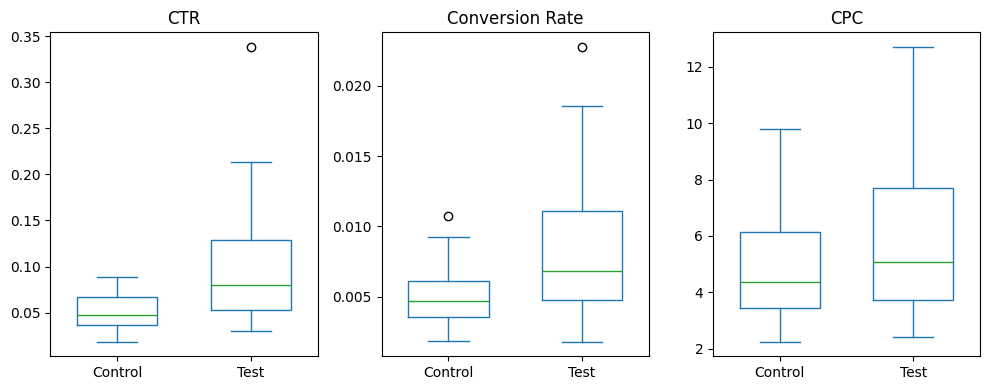

In [271]:
# Visualize the Data

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

df.loc[df['Campaign Name']=='Control Campaign', 'CTR'].plot(kind='box', ax=ax1, positions=[0], widths=0.6)
df.loc[df['Campaign Name']=='Test Campaign', 'CTR'].plot(kind='box', ax=ax1, positions=[1], widths=0.6)
ax1.set_title('CTR')
ax1.set_xticklabels(['Control', 'Test'])

df.loc[df['Campaign Name']=='Control Campaign', 'Conversion Rate'].plot(kind='box', ax=ax2, positions=[0], widths=0.6)
df.loc[df['Campaign Name']=='Test Campaign', 'Conversion Rate'].plot(kind='box', ax=ax2, positions=[1], widths=0.6)
ax2.set_title('Conversion Rate')
ax2.set_xticklabels(['Control', 'Test'])

df.loc[df['Campaign Name']=='Control Campaign', 'CPC'].plot(kind='box', ax=ax3, positions=[0], widths=0.6)
df.loc[df['Campaign Name']=='Test Campaign', 'CPC'].plot(kind='box', ax=ax3, positions=[1], widths=0.6)
ax3.set_title('CPC')
ax3.set_xticklabels(['Control', 'Test'])

plt.tight_layout()
plt.show()

In [272]:
# Check Normality: We'll use the Shapiro-Wilk test for normality.
# If the p-value is less than 0.05, we reject the null hypothesis of normality.

def check_normality(data, group_name, metric_name):
    statistic, p_value = shapiro(data)
    print(f'{group_name} - {metric_name}')
    print(f'Shapiro-Wilk test p-value: {p_value:.4f}')
    print('Normal' if p_value>0.05 else 'Not normal')
    print()

for metric in ['CTR', 'Conversion Rate', 'CPC']:
    check_normality(df.loc[df['Campaign Name']=='Control Campaign', metric], 'Control', metric)
    check_normality(df.loc[df['Campaign Name']=='Test Campaign', metric], 'Test', metric)
    

Control - CTR
Shapiro-Wilk test p-value: 0.2807
Normal

Test - CTR
Shapiro-Wilk test p-value: 0.0004
Not normal

Control - Conversion Rate
Shapiro-Wilk test p-value: 0.2723
Normal

Test - Conversion Rate
Shapiro-Wilk test p-value: 0.0035
Not normal

Control - CPC
Shapiro-Wilk test p-value: 0.0111
Not normal

Test - CPC
Shapiro-Wilk test p-value: 0.0069
Not normal



In [273]:
# Check Homogeneity of Variances: We'll use Levene's test for homogeneity of variances.
# If the p-value is less than 0.05, we reject the null hypothesis of equal variances.

def check_homogeneity(control_data, test_data, metric_name):
    statistic, p_value = levene(control_data, test_data)
    print(f'{metric_name}:')
    print(f"Levene's test p-value: {p_value:.4f}")
    print('Homogeneous variances' if p_value > 0.05 else 'Heterogeneous variances')
    print()

for metric in ['CTR', 'Conversion Rate', 'CPC']:
    check_homogeneity(df.loc[df['Campaign Name']=='Control Campaign', metric], df.loc[df['Campaign Name']=='Test Campaign', metric], metric)

CTR:
Levene's test p-value: 0.0021
Heterogeneous variances

Conversion Rate:
Levene's test p-value: 0.0082
Heterogeneous variances

CPC:
Levene's test p-value: 0.1866
Homogeneous variances



In [274]:
# Choose Appropriate Statistical Test: Based on the results of normality and homogeneity tests
# If both groups are normal and have homogeneous variances, use Independent t-test.
# If both groups are noraml but have heterogeneous variances, use Welch's t-test.
# If either group is not normal, use Mann-Whitney U test.

def conduct_statistical_test(control_data, test_data, metric_name):

    # Check normality
    control_normal = shapiro(control_data)[1] > 0.05
    test_normal = shapiro(test_data)[1] > 0.05

    # Check homogeneity of variances
    homogeneous_var = levene(control_data, test_data)[1] > 0.05

    if control_normal and test_normal:
        if homogeneous_var:
            statistic, p_value = ttest_ind(control_data, test_data)
            test_name = 'Independent t-test'
        else:
            statistic, p_value = ttest_ind(control_data, test_data, equal_var=False)
            test_name = "Welch's t-test"

    else:
        # ‘two-sided’: the distributions are not equal, i.e. F(u) ≠ G(u) for at least one u.
        statistic, p_value = mannwhitneyu(control_data, test_data, alternative='two-sided')
        test_name = 'Mann-Whitney U test'

    print(f'{metric_name}:')
    print(f'Test used: {test_name}')
    print(f'p-value: {p_value:.4f}')
    print('Statistically significant' if p_value < 0.05 else 'Not statistically significant')
    print()

for metric in ['CTR', 'Conversion Rate', 'CPC']:
    conduct_statistical_test(df.loc[df['Campaign Name']=='Control Campaign', metric], df.loc[df['Campaign Name']=='Test Campaign', metric], metric)

CTR:
Test used: Mann-Whitney U test
p-value: 0.0002
Statistically significant

Conversion Rate:
Test used: Mann-Whitney U test
p-value: 0.0037
Statistically significant

CPC:
Test used: Mann-Whitney U test
p-value: 0.2282
Not statistically significant



In [275]:
# Calculate Effect Sizes

def compare_metrics(control_data, test_data, metric_name):
    control_mean = control_data.mean()
    test_mean = test_data.mean()
    control_median = control_data.median()
    test_median = test_data.median()

    print(f"{metric_name}:")
    print(f'Control mean: {control_mean:.4f}')
    print(f'Test mean: {test_mean:.4f}')
    print(f'Mean differrence: {test_mean - control_mean:.4f}')
    print(f'Relative mean difference: {(test_mean - control_mean) / control_mean * 100:.2f}%')
    print(f'Control median: {control_median:.4f}')
    print(f'Test median: {test_median:.4f}')
    print(f'Median difference: {test_median - control_median:.4f}')
    print(f'Relative median difference: {(test_median - control_median) / control_median * 100:.2f}%')
    print()

for metric in ['CTR', 'Conversion Rate', 'CPC']:
    compare_metrics(df.loc[df['Campaign Name']=='Control Campaign', metric], df.loc[df['Campaign Name']=='Test Campaign', metric], metric)


CTR:
Control mean: 0.0509
Test mean: 0.1024
Mean differrence: 0.0515
Relative mean difference: 101.31%
Control median: 0.0479
Test median: 0.0804
Median difference: 0.0325
Relative median difference: 67.82%

Conversion Rate:
Control mean: 0.0050
Test mean: 0.0084
Mean differrence: 0.0034
Relative mean difference: 68.73%
Control median: 0.0047
Test median: 0.0068
Median difference: 0.0021
Relative median difference: 44.52%

CPC:
Control mean: 5.0009
Test mean: 5.8996
Mean differrence: 0.8987
Relative mean difference: 17.97%
Control median: 4.3668
Test median: 5.0628
Median difference: 0.6961
Relative median difference: 15.94%



$C$ **Interpretation and Conclusions**

1. Click-Through Rate (CTR):
    * Statistical test result: Statistically significant defference (p<0.05)
    * Control mean: 0.0509, Test mean: 0.1024
    * Control median: 0.0479, Test median: 0.0804
    * Relative mean difference: 101.31%
    * Relative median difference: 67.82%\
    **Interpretation**:
    * The test campaign demonstrated a statistically significant increase in CTR.
    * Both mean and median CTRs were considerably hgiher in the test campaign.
    * The improvement ranged from 68% (median) to 101% (mean),suggesting a substantial increase in user engagement.

2. Conversion Rate
    * Statistical test result: Statistically significant defference (p<0.05)
    * Control mean: 0.0050, Test mean: 0.0084
    * Control median: 0.0047, Test median: 0.0068
    * Relative mean difference: 68.73%
    * Relative median difference: 44.52%\
    **Interpretation**:
    * The test campaign showed a statistically significant improvement in conversion rate.
    * Both mean and median conversion rate were substantially higher in the test campaign.
    * The increase ranged from 45% (median) to 69% (mean), indicating a robust improvement. 

3. Cost per Conversion:
    * Statistical test result: Not statistically significant (p>0.05)
    * Control mean: 5.0009, Test mean: 5.8996
    * Control median: 4.3668, Test median: 5.0628
    * Relative mean difference: 17.97%
    * Relative median difference: 15.94%\
    **Interpretation**:
    * There was no statistically signifant difference in cost per conversion between the campaigns.
    * Both mean and median cost per conversion were slightli hgiher in the test campaign, but the difference was not significant.
    * The test campaign maintained cost efficiency while improving other metrics.

**Overall Conclusion**

1. Effectiveness: The test campaign significantly outperformed the control campaign\
in terms of both conversion rate and click-through rate. This indicates that the new\
campaign strategy was more effective at engaging users and driving conversions. 

2. Efficiency: Despite the substantial improvements in conversion rate and CTR,\
the test campaign did not significantly increase the cost per conversion.\
This suggests that the new strategy improved performance without sacrificing cost efficiency.

3. Consistency: The improvements were consistent across both mean and median measures,\
reinforcing the robustness of the results.

4. Magnitude of Improvement: The size of the improvements (68%-101% for CTR, 45%-69% for conversion rate)\
is substantial and likely to have a meaningful impact on overall marketing performance.

5. Statistical Validity: The use of approproate statistical tests, considering normality and homogeneity,\
adds condifence to these conclusions.

**Recommedndation**

Based on these results, implementing the test campaign strategy is strongly recommended.\
It demonstrates significant improvements in key perfromance metrics without increasing much costs,\
indicating a more effective and efficient marketing approach.

**Next Steps**

1. Gradually roll out the new campaign strategy to a larger audience.
2. Continue monitoring performance to ensure the improvements are sustained over time.
3. Analyze the specific elements of the test campaign that may have contribured to\
its success, to inform future campaign designs.
4. Consider running follow-up tests to further optimize the campaign parameters.

**This comprehensive analysis provides strong evidence for the superiority of the test campaign,offering a clear direction for improving marketing performance.**
